# sqptn1no task
sqptn1no task: no overlap, no noise (accurate label).

In [21]:
from ay_torch import *
import os

In [22]:
from cnn_sqptn1_1 import SqPtn1Dataset as SqPtn1noDataset
root='data_generated/sqptn1no/'

def GetDataTransforms(mode):
  if mode=='train':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        # torchvision.transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        # torchvision.transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0, hue=0),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='eval':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        #torchvision.transforms.Resize(256),
        #torchvision.transforms.CenterCrop(224),
        torchvision.transforms.ToTensor(),
        # torchvision.transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
      ])
  if mode=='none':
    return torchvision.transforms.Compose([
        torchvision.transforms.Resize(256),
        #torchvision.transforms.RandomResizedCrop(224),
        # torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor()
      ])

In [23]:
dset_train= SqPtn1noDataset(root=root, transform=GetDataTransforms('train'), train=True, label_tsfm=True)
dset_test= SqPtn1noDataset(root=root, transform=GetDataTransforms('eval'), train=False, label_tsfm=True)
#NOTE: Adjust the batch and epoch sizes.
n_batch= 64
dl_train= torch.utils.data.DataLoader(
              dataset=dset_train,
              batch_size=n_batch,
              shuffle=True,
              num_workers=2)
dl_test= torch.utils.data.DataLoader(
              dataset=dset_test,
              batch_size=n_batch,
              shuffle=False,
              num_workers=2)

In [24]:
print('dset_train size:',len(dset_train))
print('dset_train[0] input type, shape:',type(dset_train[0][0]),dset_train[0][0].shape)
print('dset_train[0] label value:',dset_train[0][1])
#print('dset_train[0][0] value:',dset_train[0][0][:,100:110,100:110])
print('dset_train[0][0] value range:',torch.min(dset_train[0][0]),torch.max(dset_train[0][0]))
print('dset_test size:',len(dset_test))
print('dset_test[0] input type, shape:',type(dset_test[0][0]),dset_test[0][0].shape)
print('dset_test[0] label value:',dset_test[0][1])
print('dset_test[0][0] value range:',torch.min(dset_test[0][0]),torch.max(dset_test[0][0]))

dset_train size: 4000
dset_train[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 256, 256])
dset_train[0] label value: tensor([0.4100])
dset_train[0][0] value range: tensor(0.) tensor(1.)
dset_test size: 2000
dset_test[0] input type, shape: <class 'torch.Tensor'> torch.Size([3, 256, 256])
dset_test[0] label value: tensor([0.0400])
dset_test[0][0] value range: tensor(0.) tensor(1.)


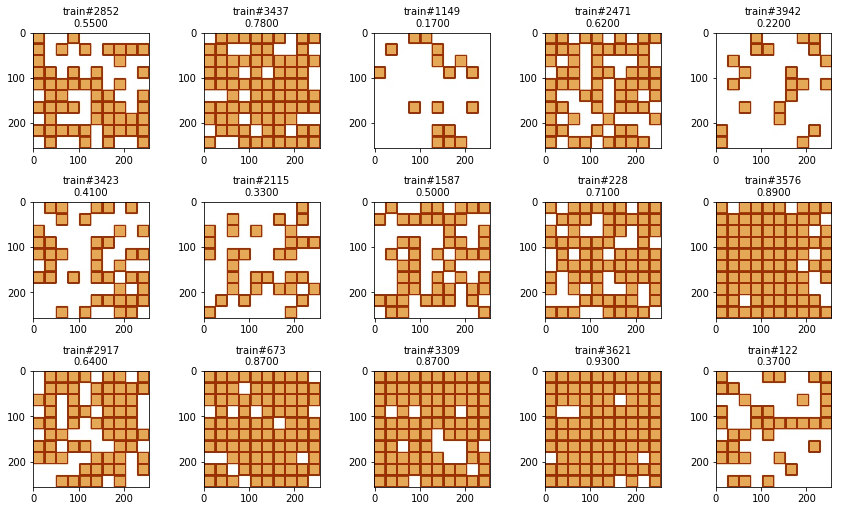

In [25]:
d= dset_train
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
labels= [f'train#{i}\n{d[i][1].item():.4f}' for i in idxes]
PlotImgGrid(imgs, labels)

# ResNet + ResDenseBlock

In [26]:
import nbimporter
from cnn_sqptn1s_1 import TResDenseNet

In [32]:
#Setup a neural network.
in_imgshape= dset_train[0][0].shape
net= TResDenseNet(in_imgshape=in_imgshape, out_channels=1)

device= torch.device('cuda:1')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
# f_loss= torch.nn.MSELoss()
f_loss= torch.nn.L1Loss()
# f_loss= torch.nn.CrossEntropyLoss()

def decode(pred):
  return pred

def rmse(y,y_trg):
  return torch.sqrt(torch.nn.functional.mse_loss(y,y_trg))
f_metric= rmse

def tfm_batch(batch):
  x,y= batch
  return x,y
logger= TLogger()
disp= TDisp()

In [ ]:
# net
input_size= (1,)+dset_train[0][0].shape
Summary(net, input_size)

FindLR progress: 0.0%
FindLR progress: 20.0%
FindLR progress: 40.0%
FindLR progress: 60.0%
FindLR progress: 80.0%
FindLR progress: 100.0%


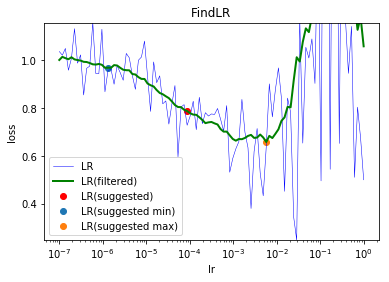

lr= 8.709635899560804e-05, lr_min=1.3182567385564072e-06, lr_max=0.0057543993733715736


In [34]:
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

i_epoch	loss(train)	loss(test)	metric(train)	metric(test)	 time
50	0.01483383	0.02253166	0.02011487	0.04486431	 10.064932
51	0.02691334	0.01655152	0.03899672	0.02995990	 9.978055
52	0.04355218	0.10807059	0.08110284	0.16637986	 9.904584
53	0.04313804	0.06456544	0.06295978	0.12970158	 9.896314
54	0.04519447	0.02919530	0.08243063	0.04090579	 9.999183
55	0.02848936	0.03307633	0.04381515	0.05363898	 10.039517
56	0.02634065	0.01709535	0.04727581	0.02805163	 10.050355
57	0.02138931	0.01237850	0.03472520	0.02011513	 10.025814
58	0.01275445	0.00553672	0.01669281	0.00793665	 10.080784
59	0.00934646	0.00518020	0.01250677	0.00725311	 10.108643
i_epoch	loss(train)	loss(test)	metric(train)	metric(test)	 time
60	0.01443659	0.02870533	0.02082607	0.06118139	 10.058128
61	0.03064003	0.02093663	0.04545293	0.02512164	 10.020350
62	0.03452144	0.03351733	0.05748574	0.05288628	 9.998142
63	0.03673583	0.01915203	0.06446054	0.02151945	 10.048442
64	0.03742570	0.07253970	0.06019643	0.19490525	 9.997249
65	0.029

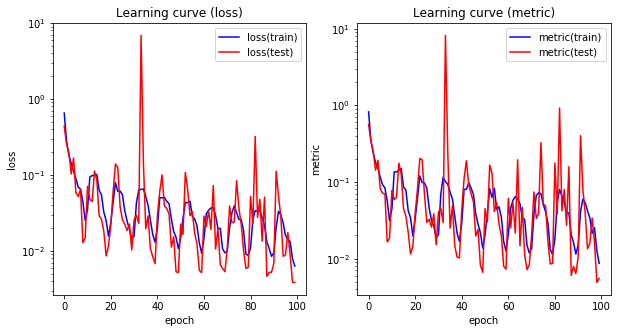

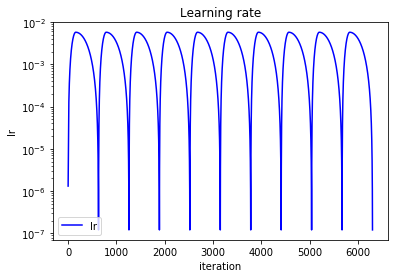

In [36]:
# lr_min,lr_max= 1e-5,1e-2
# lr_min,lr_max= 1e-6,1e-3
# lr_min,lr_max= 1e-4,1e-1
# lr_min,lr_max= 1e-5,5e-2
# lr_min,lr_max= 1e-6,3e-4
# lr_min,lr_max= 1e-7,1e-5
# lr_min,lr_max= 1e-7,1e-5
for i in range(5):
  FitOneCycle(net, n_epoch=10, lr_max=lr_max, div_init=lr_max/lr_min, 
      opt=opt, f_loss=f_loss, f_metric=f_metric,
      dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
      callbacks=(logger.Callbacks(),disp.Callbacks()),
      device=device)
logger.Show()

total epochs: 100
total time: 12.73min
best loss(train): 0.006315222095018105@99
best loss(test): 0.0038444040328613482@99
best metric(train): 0.008634635712951422@99
best metric(test): 0.004875853177509271@98


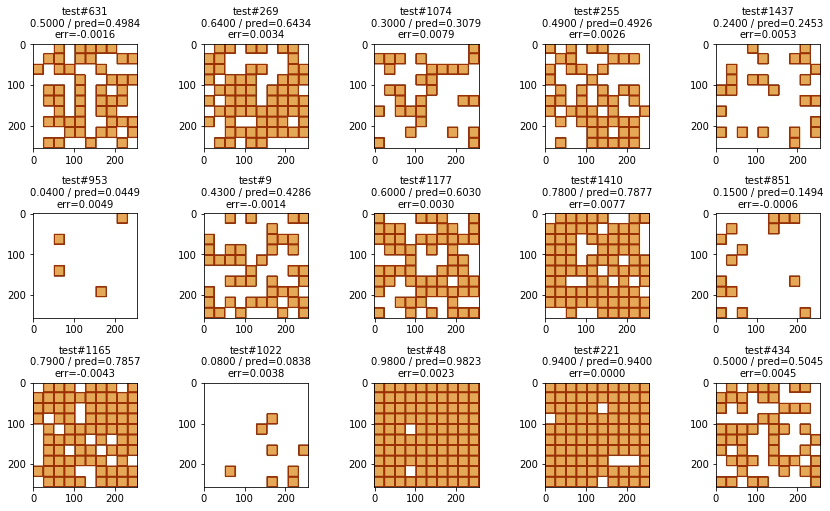

In [37]:
logger.Show('summary')
# d= dset_train
d= dset_test
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
pred_y= Eval(net,imgs,device=device).cpu()
labels= [f'test#{i}\n{d[i][1].item():.4f} / pred={lp.item():.4f}\nerr={lp.item()-d[i][1].item():.4f}' for i,lp in zip(idxes,pred_y)]
PlotImgGrid(imgs, labels)

# ResNet + ResDenseBlock + ResNetDecoder (Auto Encoder)

In [75]:
#NOTE: TResDenseNetWithAE definition was moved to ay_torch.
# import nbimporter
# from cnn_sqptn1s_1 import TRDNAEMetric
import functools
TRDNAELoss= functools.partial(TRegressionWithAELoss, f_loss_x=torch.nn.functional.mse_loss)
TRDNAEMetric= TRegressionWithAEMetric

In [78]:
#Setup a neural network.
in_imgshape= dset_train[0][0].shape
# net= TResDenseNetWithAE(in_imgshape=in_imgshape, out_channels=1, layers=[2, 2, 2, 2])
net= TResDenseNetWithAE(in_imgshape=in_imgshape, out_channels=1, latent_dim=256, layers=[2, 2, 2, 2], decoder_args=dict(stem_sizes=(64,64,32,32)))

device= torch.device('cuda:1')

#Setup an optimizer and a loss function.
opt= torch.optim.Adam(net.parameters(), lr=0.01)
f_loss= TRDNAELoss(w_xtrg=0.7)
f_metric= TRDNAEMetric()

def decode(pred):
  y,x_reconstructed,h= y_pred
  return y

def tfm_batch(batch):
  x,y= batch
  return x,(y,x)
logger= TLogger()
disp= TDisp()

In [82]:
# Use this comparison to choose a proper weight of loss w_xtrg.
elargs= dict(dset=dset_train, tfm_batch=tfm_batch, device=device)
print(f'x_reconstructed loss: {EvalLoss(net, f_loss=TRDNAELoss(w_xtrg=1), **elargs)}')
print(f'y_trg loss: {EvalLoss(net, f_loss=TRDNAELoss(w_xtrg=0), **elargs)}')
'''
At the beginning:
x_reconstructed loss: 1.3840426206588745
y_trg loss: 0.5469363478441087
'''

x_reconstructed loss: 0.0515001534469544
y_trg loss: 0.00678254689075171


'\nAt the beginning:\nx_reconstructed loss: 1.3840426206588745\ny_trg loss: 0.5469363478441087\n'

In [ ]:
# net
input_size= (1,)+dset_train[0][0].shape
Summary(net, input_size)

FindLR progress: 0.0%
FindLR progress: 20.0%
FindLR progress: 40.0%
FindLR progress: 60.0%
FindLR progress: 80.0%
FindLR progress: 100.0%


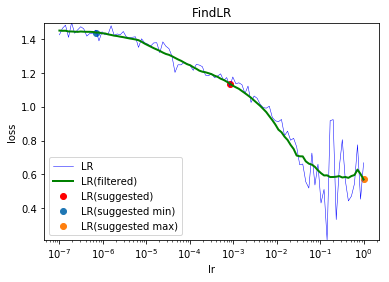

lr= 0.0008317637711026716, lr_min=6.918309709189364e-07, lr_max=1.0


In [79]:
# f_loss.w_xtrg= 0.999
# f_loss.w_xtrg= 0.9
# f_loss.w_xtrg= 0.5
# f_loss.w_xtrg= 0.1
# f_loss.w_xtrg= 0.
lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

i_epoch	loss(train)	loss(test)	metric(train)	metric(test)	 time
150	0.03802224	0.03873032	0.01200923	0.01267517	 11.828244
151	0.04124729	0.05647478	0.02190004	0.27774321	 11.720965
152	0.04659087	0.07488854	0.04150415	0.19791220	 11.775342
153	0.04709162	0.05155348	0.04286629	0.10843784	 11.839511
154	0.04442528	0.04351282	0.03654630	0.02752233	 11.748954
155	0.04167753	0.05083076	0.02501936	0.11721261	 11.870189
156	0.04210078	0.03864741	0.02746706	0.01197489	 11.832824
157	0.03920205	0.03768725	0.01724959	0.00985811	 11.866554
158	0.03879476	0.03672755	0.01534649	0.00622514	 11.873823
159	0.03845716	0.03615215	0.01409647	0.00462412	 11.931350
i_epoch	loss(train)	loss(test)	metric(train)	metric(test)	 time
160	0.03847175	0.04951850	0.01426371	0.05295112	 11.786790
161	0.04658031	0.05630006	0.04149999	0.05371827	 11.931031
162	0.04307837	0.04668801	0.02957163	0.03568847	 11.864789
163	0.04461790	0.03980960	0.03625340	0.02308603	 11.899076
164	0.04353657	0.04839118	0.03223377	0.0359375

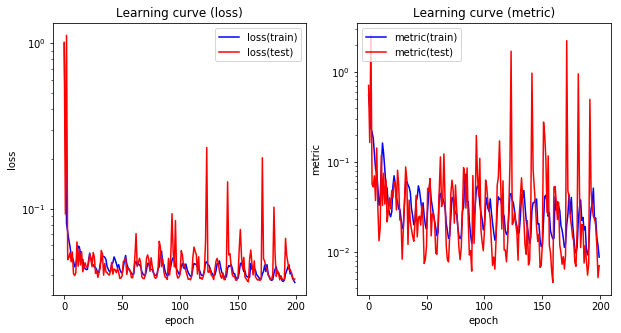

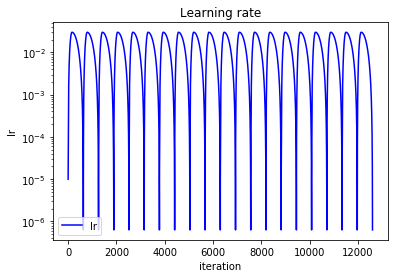

In [87]:
# lr_min,lr_max= lr_min*1e-1,lr_max*1e-1
lr_min,lr_max= 1e-5,3e-2
# lr_min,lr_max= 1e-6,3e-4
# lr_min,lr_max= 1e-6,6e-5
# lr_min,lr_max= 1e-7,1e-5
# lr_max= lr_max*1e-1
# FreezeParametersExceptFor(net, net.fc_out)
for i in range(5):
  FitOneCycle(net, n_epoch=10, lr_max=lr_max, div_init=lr_max/lr_min, 
      opt=opt, f_loss=f_loss, f_metric=f_metric,
      dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
      callbacks=(logger.Callbacks(),disp.Callbacks()),
      device=device)
logger.Show()

In [ ]:
# f_loss.w_xtrg= 0.9
# FreezeParametersExceptFor(net, net.fc_out)
# FreezeParametersExceptFor(net, (net.fc_latent,net.fc_out))
# FreezeParametersExceptFor(net, (net.encoder,net.fc_latent,net.fc_out))

lr,(lr_min,lr_max,_)= FindLR(net, opt=opt, f_loss=f_loss, dl_train=dl_train, tfm_batch=tfm_batch, device=device)
print(f'lr= {lr}, lr_min={lr_min}, lr_max={lr_max}')

In [ ]:
# f_loss.w_xtrg= 0.
# FreezeParametersExceptFor(net, net.fc_out)
# lr_min,lr_max= lr_min*1e-1,lr_max*1e-1
lr_min,lr_max= 1e-5,1e-3
# lr_min,lr_max= 1e-6,3e-4
# lr_min,lr_max= 1e-6,5e-5
# lr_min,lr_max= 1e-7,1e-5
for i in range(5):
  FitOneCycle(net, n_epoch=10, lr_max=lr_max, div_init=lr_max/lr_min, 
      opt=opt, f_loss=f_loss, f_metric=f_metric,
      dl_train=dl_train, dl_test=dl_test, tfm_batch=tfm_batch,
      callbacks=(logger.Callbacks(),disp.Callbacks()),
      device=device)
logger.Show()

total epochs: 200
total time: 31.36min
best loss(train): 0.03583895119409713@199
best loss(test): 0.03615215444006026@159
best metric(train): 0.00881959040397926@199
best metric(test): 0.004624124048859812@159


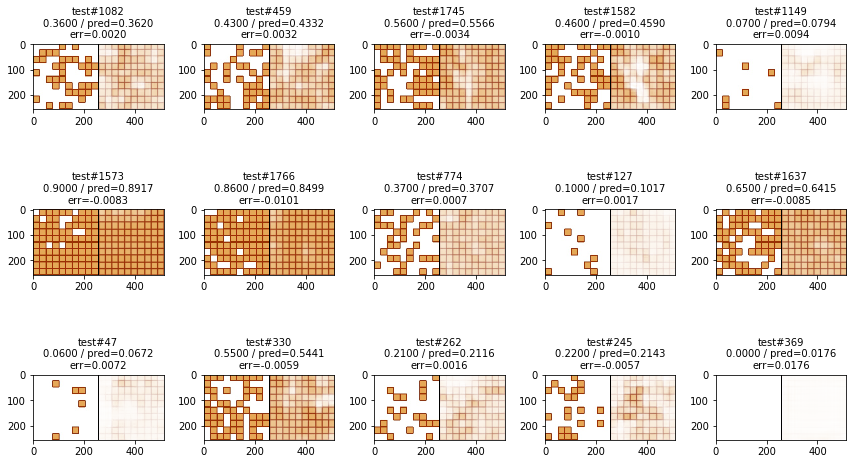

In [90]:
logger.Show('summary')
# d= dset_train
d= dset_test
idxes= np.random.permutation(len(d))[:15]
imgs= [d[i][0] for i in idxes]
pred_y,pred_x,pred_h= Eval(net,imgs,device=device)
pred_y,pred_x= pred_y.cpu(),torch.clamp(pred_x.cpu(),0,1)
labels= [f'test#{i}\n{d[i][1].item():.4f} / pred={lp.item():.4f}\nerr={lp.item()-d[i][1].item():.4f}' for i,lp in zip(idxes,pred_y)]
PlotImgGrid([HStackImages(img,x) for img,x in zip(imgs,pred_x)], labels)